# Analyse einer Twitter-Abfrage zun Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets
tweets_df = pd.read_csv('../data/TW_vegan_2021-03-24.csv')
retweets_df = pd.read_csv('../data/RT_vegan_2021-03-24.csv')

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

In [3]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gef√§llt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 32 
-> ihre tweets 45 
-> followers max 49690042 avg 1696585.2 median 179193.0 
-> friends max 89013 
-> gef√§llt mir max 10754 median 122.0


In [4]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 686 
-> ihre retweets 767 
-> retweets Median 35.0  nur 10% haben mehr als 134.0  retweets  - max 464 
-> followers max 1081206  nur 10% haben mehr als  3531.0 followers 
-> friends max 66595


In [5]:
# 1000 Gesammelte Tweets
## Prim√§rschl√ºssel tweet_id
print(tweets_df.shape)
tweets_df.head(3)

(45, 18)


Unnamed: 0             tweet_id                   creation_date  \
0           0  1374153315529990147  Tue Mar 23 00:17:35 +0000 2021   
1           1  1374381768866816012  Tue Mar 23 15:25:23 +0000 2021   
2           2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   

                                           full_text  \
0  @juliensolomita Wishing a very loud "EH BEP BE...   
1  A reminder: zoonotic spillover often has nothi...   
2  A reminder: in a vegan world there would be no...   

                               mentions entities_hashtags  \
0  ['juliensolomita', 'juliensolomita']                []   
1                                    []                []   
2                                    []  ['veganforlife']   

              user_name user_screen_name    user_id     location  \
0                 Petco            Petco   17396566          NaN   
1  Dr. Angela Rasmussen  angie_rasmussen  394087611  Seattle, WA   
2              moby X‚ìãX   thelittleidiot   14464766          l.a   

                                         description  protected  \
0  We‚Äôre setting a new standard for pet health an...      False   
1  Excessively direct virologist. Affiliate @geor...      False   
2  bald alien. adopted son of john waters. lover ...      False   

   followers_count  friends_count              profile_created_at  \
0           179193           5602  Fri Nov 14 21:46:13 +0000 2008   
1           209339           4848  Wed Oct 19 15:10:56 +0000 2011   
2          1159108           1992  Mon Apr 21 17:53:55 +0000 2008   

   retweet_count  favourite_count search_key  
0            808            10754      vegan  
1            503             2224      vegan  
2            464             2232      vegan

In [6]:
# Gesammelte Retweets auf obige Tweets
## Prim√§rschl√ºssel tweet_id, Fremdschl√ºssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(767, 19)


Unnamed: 0             tweet_id                   creation_date  \
0           0  1374766731261054986  Wed Mar 24 16:55:05 +0000 2021   
1           1  1374761924311838722  Wed Mar 24 16:35:59 +0000 2021   
2           2  1374761765507059712  Wed Mar 24 16:35:21 +0000 2021   

                                           full_text            mentions  \
0  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
1  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
2  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   

  entities_hashtags         user_name user_screen_name     user_id  \
0  ['veganforlife']        Minz üåç üï∏ üßê    CosimadiRonda  3127651429   
1  ['veganforlife']      miles vorkos     miles_vorkos  3299543789   
2  ['veganforlife']  aidan o driscoll         aidanodr     6749452   

                         location  \
0                         England   
1                             NaN   
2  Carrigaline, Co. Cork, ireland   

                                         description  protected  \
0  Lover of art, photography, film. Passionate fl...      False   
1                                                NaN      False   
2  IT/Web Design - Netactive Solutions Ltd\n\nhtt...      False   

   followers_count  friends_count              profile_created_at  \
0             1875           1495  Wed Apr 01 19:07:59 +0000 2015   
1              161            244  Tue May 26 17:18:23 +0000 2015   
2              945           3844  Mon Jun 11 17:50:45 +0000 2007   

   retweet_count  favourite_count             RT_of_ID search_key  
0            464                0  1374372252179779594      vegan  
1            464                0  1374372252179779594      vegan  
2            464                0  1374372252179779594      vegan

In [7]:
# Joinen der beiden DF mit Left-Join 
df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
df.head(2)

Unnamed: 0_x           tweet_id_x                 creation_date_x  \
0             0  1374153315529990147  Tue Mar 23 00:17:35 +0000 2021   
1             1  1374381768866816012  Tue Mar 23 15:25:23 +0000 2021   

                                         full_text_x  \
0  @juliensolomita Wishing a very loud "EH BEP BE...   
1  A reminder: zoonotic spillover often has nothi...   

                             mentions_x entities_hashtags_x  \
0  ['juliensolomita', 'juliensolomita']                  []   
1                                    []                  []   

            user_name_x user_screen_name_x  user_id_x   location_x  ...  \
0                 Petco              Petco   17396566          NaN  ...   
1  Dr. Angela Rasmussen    angie_rasmussen  394087611  Seattle, WA  ...   

  location_y  description_y  protected_y  followers_count_y friends_count_y  \
0        NaN            NaN          NaN                NaN             NaN   
1        NaN            NaN          NaN                NaN             NaN   

   profile_created_at_y  retweet_count_y favourite_count_y  RT_of_ID  \
0                   NaN              NaN               NaN       NaN   
1                   NaN              NaN               NaN       NaN   

   search_key_y  
0           NaN  
1           NaN  

[2 rows x 37 columns]

In [8]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'tweet_id_x', 'creation_date_x', 'full_text_x',
       'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'tweet_id_y', 'creation_date_y',
       'full_text_y', 'mentions_y', 'entities_hashtags_y', 'user_name_y',
       'user_screen_name_y', 'user_id_y', 'location_y', 'description_y',
       'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [9]:
df.describe()

Unnamed: 0_x    tweet_id_x     user_id_x  followers_count_x  \
count    769.000000  7.690000e+02  7.690000e+02       7.690000e+02   
mean      22.827048  1.373431e+18  2.975008e+16       1.754615e+06   
std       12.380260  9.651747e+14  1.870357e+17       7.505266e+06   
min        0.000000  1.371861e+18  8.070950e+05       4.221000e+03   
25%       12.000000  1.372323e+18  1.601444e+07       8.173900e+04   
50%       23.000000  1.373997e+18  3.378794e+07       1.473040e+05   
75%       33.000000  1.374127e+18  3.575843e+08       1.081206e+06   
max       44.000000  1.374636e+18  1.204095e+18       4.969004e+07   

       friends_count_x  retweet_count_x  favourite_count_x  Unnamed: 0_y  \
count       769.000000       769.000000         769.000000    767.000000   
mean      10389.825748        66.721717         428.080624    383.000000   
std       19170.756489        89.354838        1005.832973    221.558119   
min          18.000000        16.000000          26.000000      0.000000   
25%        1365.000000        22.000000          76.000000    191.500000   
50%        5030.000000        35.000000         108.000000    383.000000   
75%        7299.000000        68.000000         251.000000    574.500000   
max       89013.000000       808.000000       10754.000000    766.000000   

         tweet_id_y     user_id_y  followers_count_y  friends_count_y  \
count  7.670000e+02  7.670000e+02       7.670000e+02       767.000000   
mean   1.373713e+18  4.496974e+17       4.693484e+03      1702.178618   
std    9.202559e+14  5.581682e+17       4.508034e+04      4072.944657   
min    1.371865e+18  6.634632e+06       0.000000e+00         5.000000   
25%    1.372752e+18  2.823018e+08       9.500000e+01       208.000000   
50%    1.374092e+18  2.626064e+09       3.320000e+02       581.000000   
75%    1.374461e+18  1.035815e+18       1.183500e+03      1884.000000   
max    1.374767e+18  1.374112e+18       1.081206e+06     66595.000000   

       retweet_count_y  favourite_count_y      RT_of_ID  
count       767.000000              767.0  7.670000e+02  
mean         65.186441                0.0  1.373429e+18  
std          83.886442                0.0  9.654674e+14  
min          16.000000                0.0  1.371861e+18  
25%          22.000000                0.0  1.372323e+18  
50%          35.000000                0.0  1.373997e+18  
75%          68.000000                0.0  1.374127e+18  
max         464.000000                0.0  1.374636e+18

In [10]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [11]:
# Suchen der Tweet_ID im neuen DF m√ºssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

Unnamed: 0_x           tweet_id_x                 creation_date_x  \
2             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   
3             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   

                                         full_text_x mentions_x  \
2  A reminder: in a vegan world there would be no...         []   
3  A reminder: in a vegan world there would be no...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x location_x  \
2    ['veganforlife']    moby X‚ìãX     thelittleidiot   14464766        l.a   
3    ['veganforlife']    moby X‚ìãX     thelittleidiot   14464766        l.a   

   ... location_y                                      description_y  \
2  ...    England  Lover of art, photography, film. Passionate fl...   
3  ...        NaN                                                NaN   

   protected_y  followers_count_y friends_count_y  \
2        False             1875.0          1495.0   
3        False              161.0           244.0   

             profile_created_at_y  retweet_count_y favourite_count_y  \
2  Wed Apr 01 19:07:59 +0000 2015            464.0               0.0   
3  Tue May 26 17:18:23 +0000 2015            464.0               0.0   

       RT_of_ID  search_key_y  
2  1.374372e+18         vegan  
3  1.374372e+18         vegan  

[2 rows x 37 columns]

In [12]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

Unnamed: 0             tweet_id                   creation_date  \
0           0  1374766731261054986  Wed Mar 24 16:55:05 +0000 2021   
1           1  1374761924311838722  Wed Mar 24 16:35:59 +0000 2021   

                                           full_text            mentions  \
0  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
1  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   

  entities_hashtags     user_name user_screen_name     user_id location  \
0  ['veganforlife']    Minz üåç üï∏ üßê    CosimadiRonda  3127651429  England   
1  ['veganforlife']  miles vorkos     miles_vorkos  3299543789      NaN   

                                         description  protected  \
0  Lover of art, photography, film. Passionate fl...      False   
1                                                NaN      False   

   followers_count  friends_count              profile_created_at  \
0             1875           1495  Wed Apr 01 19:07:59 +0000 2015   
1              161            244  Tue May 26 17:18:23 +0000 2015   

   retweet_count  favourite_count             RT_of_ID search_key  
0            464                0  1374372252179779594      vegan  
1            464                0  1374372252179779594      vegan

## Auswertung TW

In [13]:
# Defintion des Anteils
viele = 0.8


# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol


user_id           user_name  followers_count  retweet_count  \
18      807095  The New York Times         49690042             33   
7     15808765         Cory Booker          4962731             72   
26   173195708      Nigella Lawson          2745462             88   
39  4020532937               Tasty          1434445             42   
2     14464766            moby X‚ìãX          1159108            464   
5      9890492                PETA          1081206             63   

    favourite_count  friends_count  
18              248            805  
7               569          89013  
26              864            915  
39              180            174  
2              2232           1992  
5               142           5030

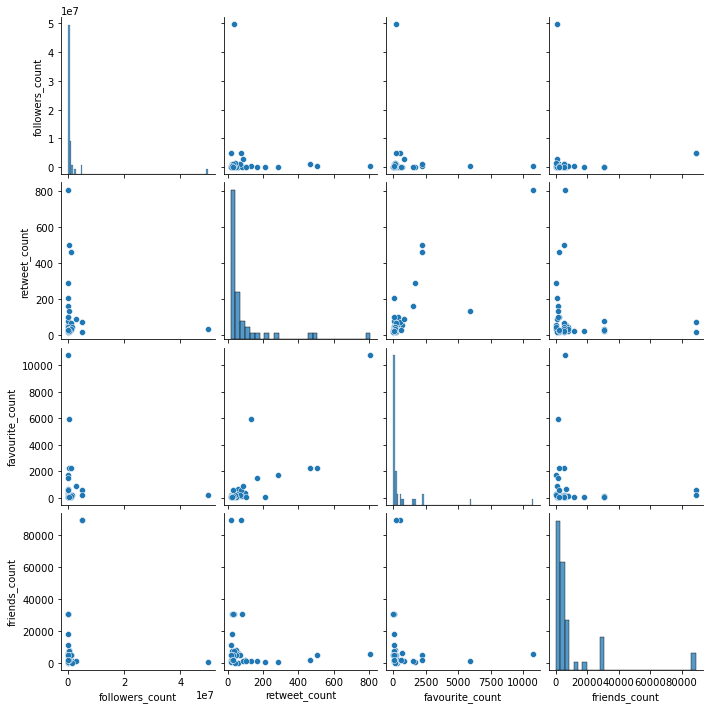

In [14]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

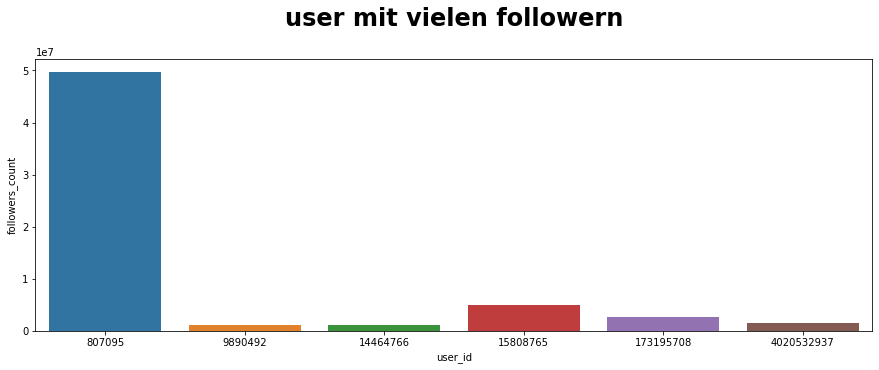

In [15]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [16]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour

user_id                                 user_name  \
0              17396566                                     Petco   
29             32184345                           Nicola Coughlan   
2              14464766                                  moby X‚ìãX   
1             394087611                      Dr. Angela Rasmussen   
19  1204095351944368139                               Spike Cohen   
22             87371781  Imani Barbarin, MAGC | Crutches&Spice ‚ôøÔ∏è   
26            173195708                            Nigella Lawson   
4              15344145                               Dawn Foster   
44            189088175                         The Vegan Gorilla   

    followers_count  retweet_count  favourite_count  friends_count  
0            179193            808            10754           5602  
29           266032            134             5923           1365  
2           1159108            464             2232           1992  
1            209339            503             2224           4848  
19            65527            287             1700            217  
22            92187            164             1526           1187  
26          2745462             88              864            915  
4             87511             56              677           6360  
44            12705             28              575           1973

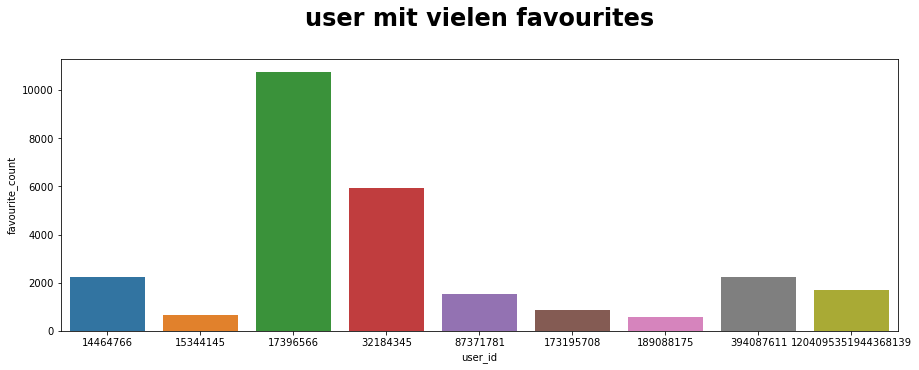

In [17]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="favourite_count", data=df_favour)

In [18]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret

user_id                                 user_name  \
0              17396566                                     Petco   
1             394087611                      Dr. Angela Rasmussen   
2              14464766                                  moby X‚ìãX   
19  1204095351944368139                               Spike Cohen   
15           1245158946                                The Social   
22             87371781  Imani Barbarin, MAGC | Crutches&Spice ‚ôøÔ∏è   
29             32184345                           Nicola Coughlan   
30             19257934                           Suzy Pelta üë©üèΩ‚Äçüç≥   
3            2659372678                  üá¨üáß Dr Dominic Pimenta üá¨üáß   

    followers_count  retweet_count  favourite_count  friends_count  
0            179193            808            10754           5602  
1            209339            503             2224           4848  
2           1159108            464             2232           1992  
19            65527            287             1700            217  
15           122333            208               82            517  
22            92187            164             1526           1187  
29           266032            134             5923           1365  
30            23174            103               60           1362  
3             53502            100              387           1723

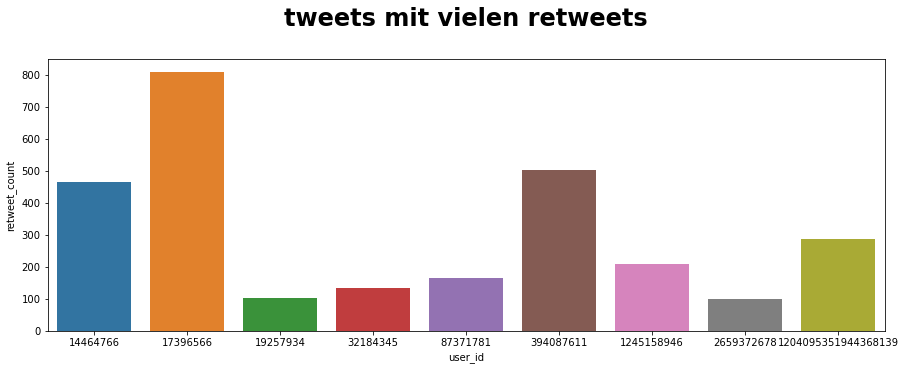

In [19]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¬∂

In [20]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends

user_id     user_name  followers_count  retweet_count  favourite_count  \
7    15808765   Cory Booker          4962731             72              569   
9   357584312       PETA UK           100734             35               62   
14  452100948    Peter Egan            81739             24               79   
38   48702842  Erik Solheim           147304             20               80   
20   22956018    jann arden           335073             44              138   

    friends_count  
7           89013  
9           30478  
14          17828  
38          11189  
20           7907

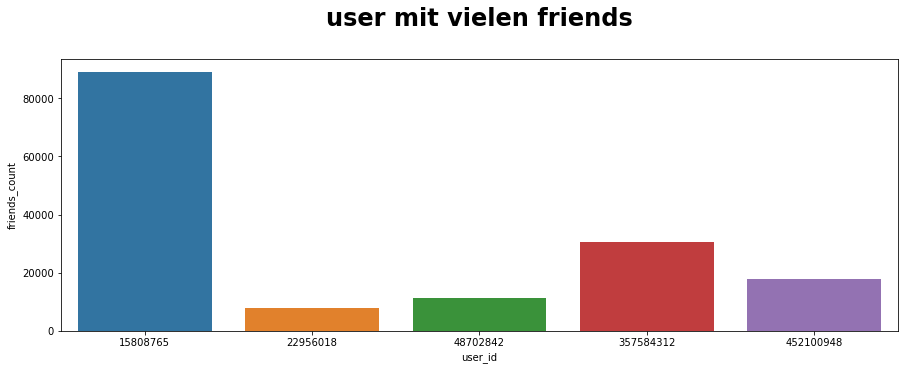

In [21]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="friends_count", data=df_friends)

## Auswertung RT

In [22]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

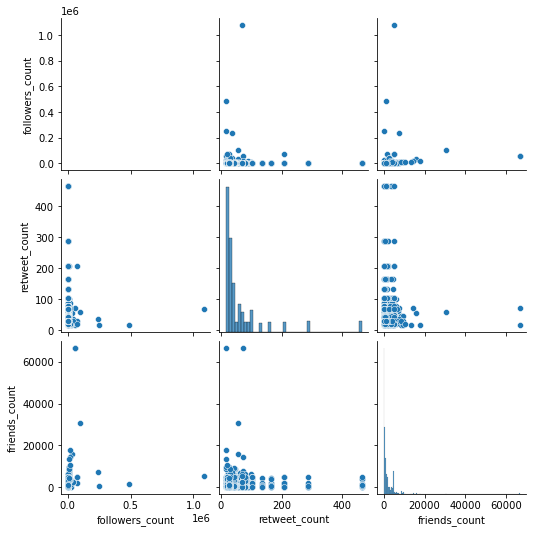

In [23]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

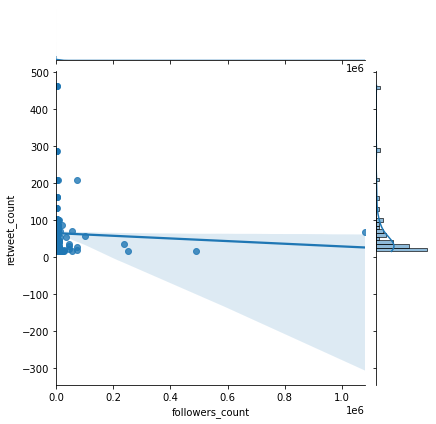

In [24]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

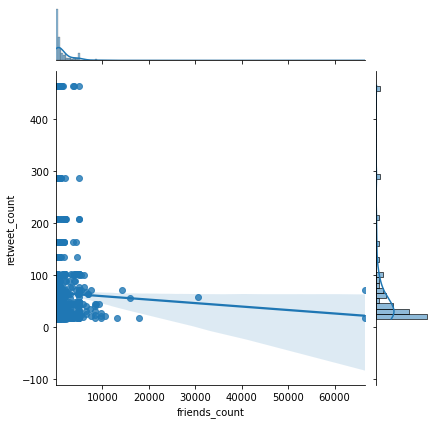

In [25]:

ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

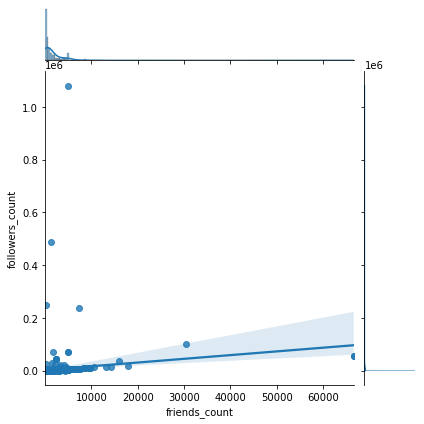

In [26]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

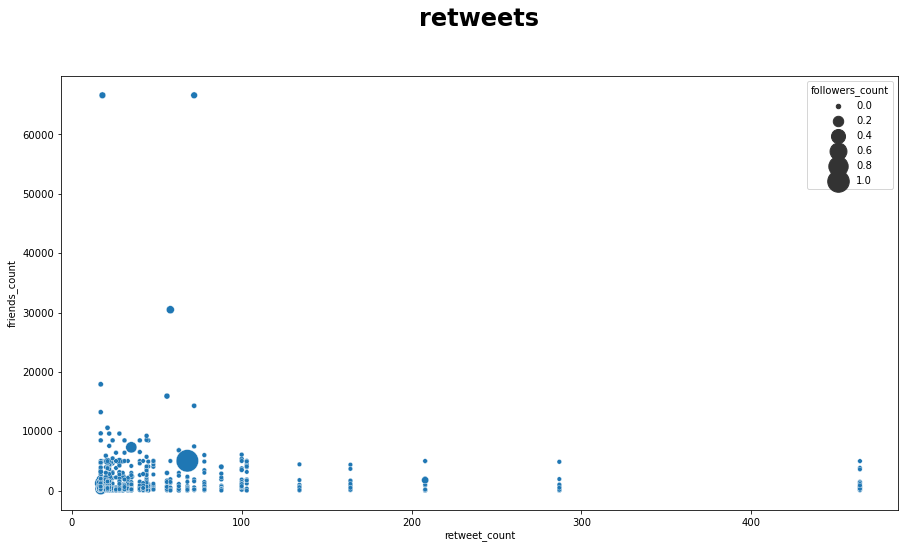

In [27]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [28]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

### Gibt es tweeter, die auch retweeter sind?

In [29]:
subsetdf = df[df['user_id_x'].isin(['user_id_y']) ]
subsetdf

Empty DataFrame
Columns: [Unnamed: 0_x, tweet_id_x, creation_date_x, full_text_x, mentions_x, entities_hashtags_x, user_name_x, user_screen_name_x, user_id_x, location_x, description_x, protected_x, followers_count_x, friends_count_x, profile_created_at_x, retweet_count_x, favourite_count_x, search_key_x, Unnamed: 0_y, tweet_id_y, creation_date_y, full_text_y, mentions_y, entities_hashtags_y, user_name_y, user_screen_name_y, user_id_y, location_y, description_y, protected_y, followers_count_y, friends_count_y, profile_created_at_y, retweet_count_y, favourite_count_y, RT_of_ID, search_key_y]
Index: []

[0 rows x 37 columns]

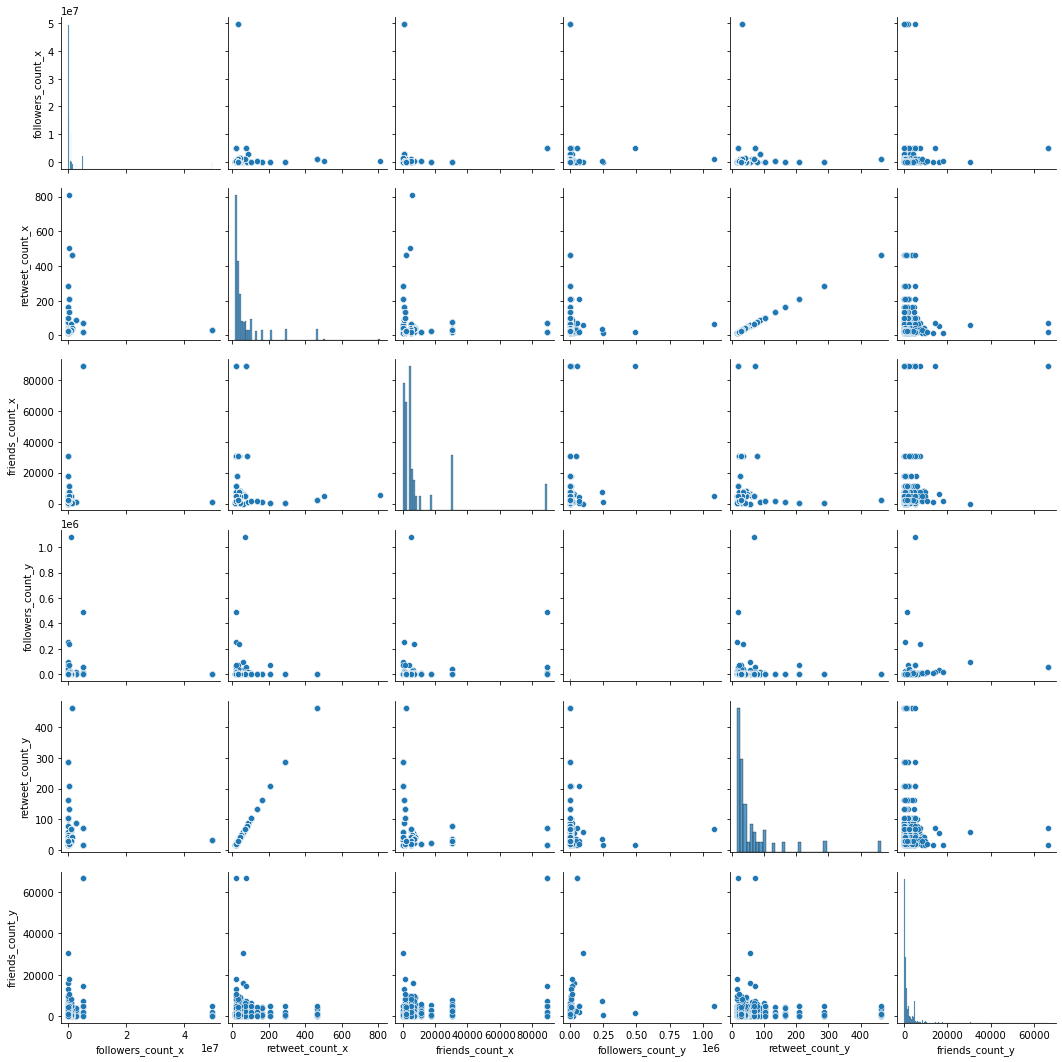

In [30]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)

## NetworkX

In [31]:
import networkx as nx
import warnings

In [32]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="user_name_x",target="user_name_y")

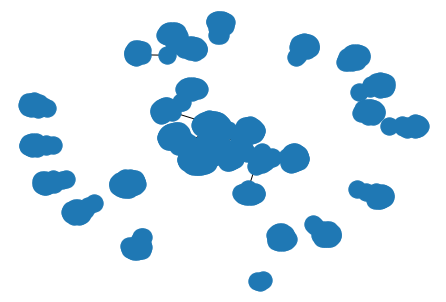

In [33]:
G = nx.from_pandas_edgelist(df,source="user_name_x",target="user_name_y")
nx.draw(G, with_labels=False)
plt.show()

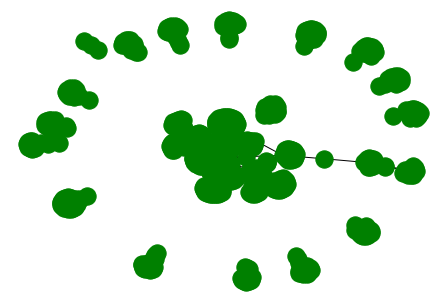

In [34]:
nx.draw(G, with_labels=False, node_color="g" )

In [35]:
type(G)

networkx.classes.graph.Graph

In [36]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 715\nNumber of edges: 729\nAverage degree:   2.0392'

In [37]:
G.nodes()
len(G.nodes)

715

## edge-analysis

In [38]:
G.edges()

EdgeView([('Petco', nan), (nan, 'Dr. Angela Rasmussen'), ('moby X‚ìãX', 'Minz üåç üï∏ üßê'), ('moby X‚ìãX', 'miles vorkos'), ('moby X‚ìãX', 'aidan o driscoll'), ('moby X‚ìãX', 'Kishan Patel'), ('moby X‚ìãX', 'StopEatingAnimals'), ('moby X‚ìãX', 'Nicolas Giro'), ('moby X‚ìãX', 'ThatLittleSoyThing'), ('moby X‚ìãX', "Miley's Brother"), ('moby X‚ìãX', 'full_stack'), ('moby X‚ìãX', 'Amethyst Janes'), ('moby X‚ìãX', 'Hell-phist√∏pheles'), ('moby X‚ìãX', 'Jill Petersons'), ('moby X‚ìãX', 'Nana Sei'), ('moby X‚ìãX', 'Giulia - Sii il cambiamento che vuoi vedere'), ('moby X‚ìãX', 'Java Ship Coffee'), ('moby X‚ìãX', 'W I B E R G'), ('moby X‚ìãX', 'Vegan Me'), ('moby X‚ìãX', '„Äå Áå´„ÅÆÁî∑üò∏ „Äç'), ('moby X‚ìãX', 'üêæActivistaMXüåé'), ('üá¨üáß Dr Dominic Pimenta üá¨üáß', 'Frank Davies'), ('üá¨üáß Dr Dominic Pimenta üá¨üáß', 'pocketbelt'), ('üá¨üáß Dr Dominic Pimenta üá¨üáß', "[lysithea voice] no, YOU'RE baby *unmakes you*"), ('üá¨üáß Dr Dominic Pimenta üá¨üáß', 'Dave. (Still

In [39]:
len(G.edges())

729

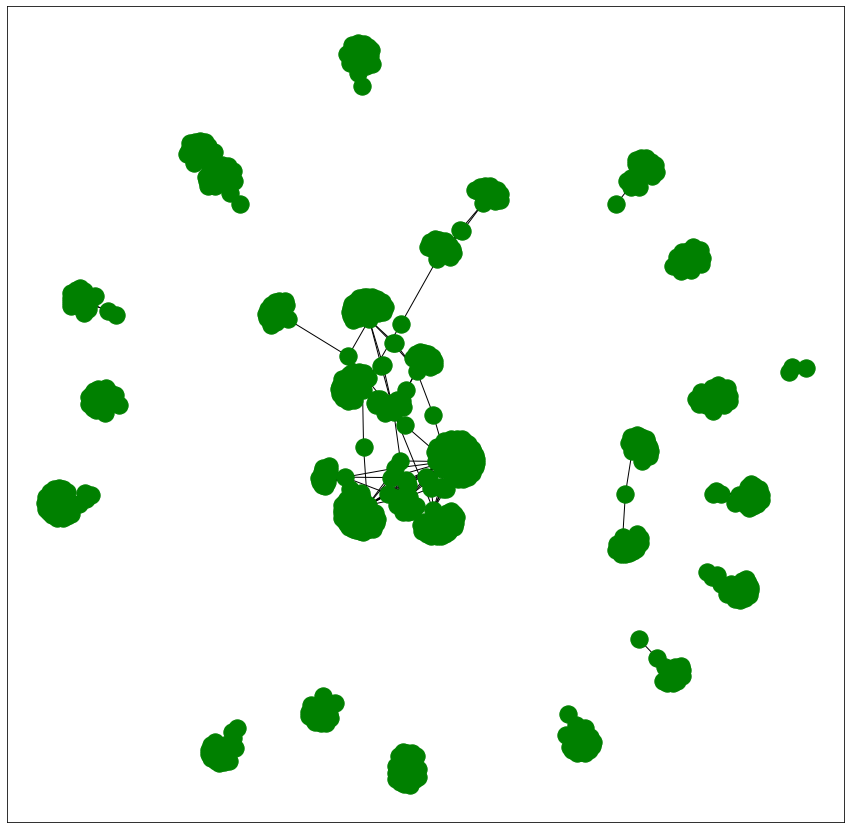

In [40]:
plt.figure(figsize= (15,15))
nx.draw_networkx(G, with_labels=False, node_color="g" )

## Measures
* Degree Centrality
* Most Influental
*


In [41]:
nx.degree(G)

DegreeView({'Petco': 1, nan: 2, 'Dr. Angela Rasmussen': 1, 'moby X‚ìãX': 19, 'Minz üåç üï∏ üßê': 1, 'miles vorkos': 1, 'aidan o driscoll': 1, 'Kishan Patel': 1, 'StopEatingAnimals': 1, 'Nicolas Giro': 1, 'ThatLittleSoyThing': 1, "Miley's Brother": 1, 'full_stack': 1, 'Amethyst Janes': 1, 'Hell-phist√∏pheles': 1, 'Jill Petersons': 1, 'Nana Sei': 1, 'Giulia - Sii il cambiamento che vuoi vedere': 1, 'Java Ship Coffee': 1, 'W I B E R G': 1, 'Vegan Me': 1, '„Äå Áå´„ÅÆÁî∑üò∏ „Äç': 1, 'üêæActivistaMXüåé': 1, 'üá¨üáß Dr Dominic Pimenta üá¨üáß': 18, 'Frank Davies': 1, 'pocketbelt': 1, "[lysithea voice] no, YOU'RE baby *unmakes you*": 1, 'Dave. (Still Laughing At The Fascists) IMP': 1, 'Lee Dobson': 1, 'Thom_Ntinas_Sound': 1, 'Audrey': 1, 'aina(‚Äòs bones are aching)': 1, 'Jonathan Reedüá™üá∫üåπ': 1, 'Miranda Jonesüíô': 1, 'LGConnollyüíô‚òòüá™üá∫#IamEuropean#fbpe': 1, 'Eamon Cassells': 1, 'Christopher Wood': 1, 'Catherine Langley Zamojskiüíôüáøüá¶üá™üá∫': 1, 'i said what th

In [43]:
# id 22956018 hat 19 Kontakte

nx.degree(G,"Cousin Grexit")

1

# Wer hat am meisten Einfluss?
nx.degree_centrality(G)

In [44]:
sorted(nx.degree_centrality(G).values(), reverse=True)

[0.12044817927170869,
 0.09103641456582633,
 0.06442577030812326,
 0.056022408963585436,
 0.05182072829131653,
 0.04481792717086835,
 0.028011204481792718,
 0.028011204481792718,
 0.028011204481792718,
 0.02661064425770308,
 0.02661064425770308,
 0.02661064425770308,
 0.02661064425770308,
 0.02661064425770308,
 0.02661064425770308,
 0.025210084033613446,
 0.025210084033613446,
 0.025210084033613446,
 0.025210084033613446,
 0.025210084033613446,
 0.025210084033613446,
 0.025210084033613446,
 0.023809523809523808,
 0.023809523809523808,
 0.022408963585434174,
 0.022408963585434174,
 0.022408963585434174,
 0.02100840336134454,
 0.02100840336134454,
 0.0196078431372549,
 0.004201680672268907,
 0.004201680672268907,
 0.004201680672268907,
 0.004201680672268907,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.0028011204481792717,
 0.00280112044817

In [45]:
most_influential = nx.degree_centrality(G)
for id_tw in sorted(most_influential, key =most_influential.get, reverse = True):
    print("Influencer:", id_tw, "centrality", most_influential[id_tw])

Influencer: PETA centrality 0.12044817927170869
Influencer: PETA UK centrality 0.09103641456582633
Influencer: Mercy For Animals centrality 0.06442577030812326
Influencer: The Vegan Society centrality 0.056022408963585436
Influencer: Vegan Outreach centrality 0.05182072829131653
Influencer: Cory Booker centrality 0.04481792717086835
Influencer: Pomp üå™ centrality 0.028011204481792718
Influencer: Peter Egan centrality 0.028011204481792718
Influencer: Gad Saad centrality 0.028011204481792718
Influencer: moby X‚ìãX centrality 0.02661064425770308
Influencer: Spike Cohen centrality 0.02661064425770308
Influencer: jann arden centrality 0.02661064425770308
Influencer: Plant Based News centrality 0.02661064425770308
Influencer: Suzy Pelta üë©üèΩ‚Äçüç≥ centrality 0.02661064425770308
Influencer: Erik Solheim centrality 0.02661064425770308
Influencer: üá¨üáß Dr Dominic Pimenta üá¨üáß centrality 0.025210084033613446
Influencer: The Social centrality 0.025210084033613446
Influencer: The Ne

Influencer: San Francisco Chronicle centrality 0.0014005602240896359
Influencer: I don‚Äôt like commiesü•∏ centrality 0.0014005602240896359
Influencer: BlessingInDisguise @HelenJo centrality 0.0014005602240896359
Influencer: Inus centrality 0.0014005602240896359
Influencer: SnowLion centrality 0.0014005602240896359
Influencer: Sveta centrality 0.0014005602240896359
Influencer: Colin Reese centrality 0.0014005602240896359
Influencer: Stew centrality 0.0014005602240896359
Influencer: Gamayun centrality 0.0014005602240896359
Influencer: wynburn centrality 0.0014005602240896359
Influencer: ImCastorTroy centrality 0.0014005602240896359
Influencer: Andrew centrality 0.0014005602240896359
Influencer: jackkmamf centrality 0.0014005602240896359
Influencer: Somebody, please stop the ride centrality 0.0014005602240896359
Influencer: Julia centrality 0.0014005602240896359
Influencer: Hendrik de Man centrality 0.0014005602240896359
Influencer: $Dan centrality 0.0014005602240896359
Influencer: Happ

### Most important connection eigenvector

In [46]:
most_important_connection = nx.eigenvector_centrality(G)
most_important_connection

{'Petco': 3.7745348480939325e-27,
 nan: 5.33799837382431e-27,
 'Dr. Angela Rasmussen': 3.7745348480939325e-27,
 'moby X‚ìãX': 3.7964153451858386e-13,
 'Minz üåç üï∏ üßê': 8.709573991309556e-14,
 'miles vorkos': 8.709573991309556e-14,
 'aidan o driscoll': 8.709573991309556e-14,
 'Kishan Patel': 8.709573991309556e-14,
 'StopEatingAnimals': 8.709573991309556e-14,
 'Nicolas Giro': 8.709573991309556e-14,
 'ThatLittleSoyThing': 8.709573991309556e-14,
 "Miley's Brother": 8.709573991309556e-14,
 'full_stack': 8.709573991309556e-14,
 'Amethyst Janes': 8.709573991309556e-14,
 'Hell-phist√∏pheles': 8.709573991309556e-14,
 'Jill Petersons': 8.709573991309556e-14,
 'Nana Sei': 8.709573991309556e-14,
 'Giulia - Sii il cambiamento che vuoi vedere': 8.709573991309556e-14,
 'Java Ship Coffee': 8.709573991309556e-14,
 'W I B E R G': 8.709573991309556e-14,
 'Vegan Me': 8.709573991309556e-14,
 '„Äå Áå´„ÅÆÁî∑üò∏ „Äç': 8.709573991309556e-14,
 'üêæActivistaMXüåé': 8.709573991309556e-14,
 'üá¨üáß Dr D

In [50]:
for id_tw in sorted(most_important_connection,key = most_important_connection.get, reverse = True):
    print("Connector: ", id_tw)

Connector:  PETA
Connector:  PETA UK
Connector:  Mercedes Fernandez
Connector:  Roberto
Connector:  Emilyü¶ã
Connector:  Gisella Vargas üá©üá¥üáµüá∑
Connector:  KPüåéüå±üò∑
Connector:  Andrew Higgs
Connector:  B√©atrice C
Connector:  Fariba Parniani
Connector:  Les Fabian‚ìã
Connector:  brad
Connector:  Juliet Johns Pearson
Connector:  Leafs4Everüá®üá¶
Connector:  Cynthia
Connector:  VeganSchmoozequeen
Connector:  Nathalie
Connector:  Mercy For Animals
Connector:  Michelle
Connector:  Drdave Anddee
Connector:  ÁãºÂ∞ëÂ•≥
Connector:  Ìã∞ÎÇò üáπüá∑
Connector:  „Ç§„É´„Ç´„Ç∑„Éß„Éº„Çí„Éú„Ç§„Ç≥„ÉÉ„Éà„Çí„Åó„Çà„ÅÜüå±
Connector:  Nina Clark üíô
Connector:  ùòºùñóÍ™ÄùíÇùïß ∆ôùñÜÍ™äùêíùíΩùñéùêä
Connector:  Seifer Of Balamb
Connector:  Anita
Connector:  „Ç§„É´„Ç´„Ç∑„Éß„Éº„Çí„Éú„Ç§„Ç≥„ÉÉ„Éà„Çí„Åó„Çà„ÅÜ
Connector:  Ewa
Connector:  Twetch/u/1622
Connector:  Pita Louise
Connector:  C√©cile Schmitter
Connector:  IRENE TRESP
Connector:  #„Ç§„É´„Ç´„Ç∑„Éß„Éº„ÇíÁµ∂ÂØæË¶ã„Å™„ÅÑ! #„Ç§„É

### What is the shortest connection between ....

In [48]:
def path(graph,a,b):    
    try: return(nx.shortest_path(graph,a, b))
    except: return("no connection")

In [49]:
a = "Cousin Grexit"
b = 'The Vegan Gorilla'
path(G,a,b)

'no connection'

### Betweenness-Centrality

In [51]:
nx.betweenness_centrality(G)

{'Petco': 0.0,
 nan: 7.857280359549149e-06,
 'Dr. Angela Rasmussen': 0.0,
 'moby X‚ìãX': 0.0006717974707414522,
 'Minz üåç üï∏ üßê': 0.0,
 'miles vorkos': 0.0,
 'aidan o driscoll': 0.0,
 'Kishan Patel': 0.0,
 'StopEatingAnimals': 0.0,
 'Nicolas Giro': 0.0,
 'ThatLittleSoyThing': 0.0,
 "Miley's Brother": 0.0,
 'full_stack': 0.0,
 'Amethyst Janes': 0.0,
 'Hell-phist√∏pheles': 0.0,
 'Jill Petersons': 0.0,
 'Nana Sei': 0.0,
 'Giulia - Sii il cambiamento che vuoi vedere': 0.0,
 'Java Ship Coffee': 0.0,
 'W I B E R G': 0.0,
 'Vegan Me': 0.0,
 '„Äå Áå´„ÅÆÁî∑üò∏ „Äç': 0.0,
 'üêæActivistaMXüåé': 0.0,
 'üá¨üáß Dr Dominic Pimenta üá¨üáß': 0.0006010819475055099,
 'Frank Davies': 0.0,
 'pocketbelt': 0.0,
 "[lysithea voice] no, YOU'RE baby *unmakes you*": 0.0,
 'Dave. (Still Laughing At The Fascists) IMP': 0.0,
 'Lee Dobson': 0.0,
 'Thom_Ntinas_Sound': 0.0,
 'Audrey': 0.0,
 'aina(‚Äòs bones are aching)': 0.0,
 'Jonathan Reedüá™üá∫üåπ': 0.0,
 'Miranda Jonesüíô': 0.0,
 'LGConnollyüíô‚òò

In [52]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

FARM Animal Rights 0.1009884131305629
PETA 0.10007229321524473
Vegan Outreach 0.08518202980116747
PETA UK 0.08378676388741589
Mercy For Animals 0.06149834096019584
Suzy Pelta üë©üèΩ‚Äçüç≥ 0.04690599942641853
Sustainable Living 0.04638938324277818
The Vegan Society 0.045254006230823325
Roberto 0.043843237778203106
Maria Creasey 0.038587627664436394
Peter Egan 0.026424033849163787
Plant Based News 0.02640649059998003
Drdave Anddee 0.02383180481168622
The Social 0.022348069662647668
please be kind to all animals ‚ì• 0.02165926679227089
Ingrid Newkirk 0.020896787887665563
PETA Asia 0.02026447480971509
Fariba Parniani 0.011707580024373795
ANNA MAIETTA 0.011558583227587427
coconut 0.011558583227587427
Ava 0.011554130768717023
TREV 0.011554130768717023
ÁãºÂ∞ëÂ•≥ 0.01073360620545554
Mercedes Fernandez 0.009332802779830963
Beach Cat 0.007125505648729813
Afterstorm 0.006629168731541236
Lightspeed 0.006629168731541236
meowss 0.006629168731541236
rsarhh 0.006629168731541236
Dragofix 0.006629168